In [68]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from aux_funcs import parse_string_with_regex


AVERAGING_SIZE = 20

In [69]:
def load_data(data_path, averaging_size=AVERAGING_SIZE):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=1)
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data
    

## Sweeping the effect of the activity weight
Note: values of the noise variance were actually zero for all these experiments

0.066275
0.062224999999999996
0.017975
0.0181



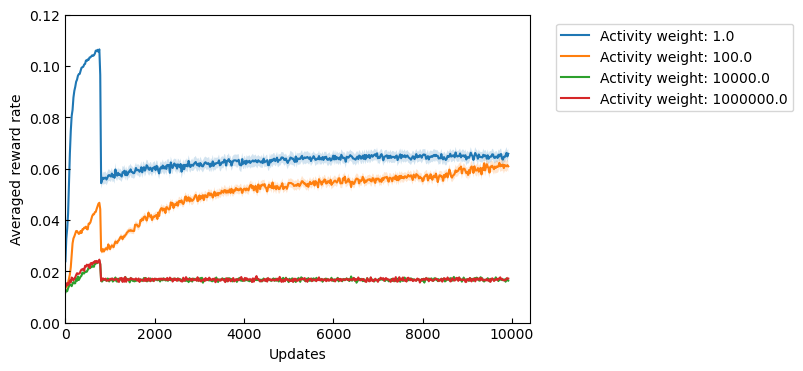

In [102]:
data_dir_regex = '../data/rl_agent_outputs/det_reward_to_stoch_noise_activity_penalty_*_var_noise_*_activity_weight_*/reward_rates'

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

for data_dir in glob.glob(data_dir_regex):
    data_dir = data_dir.replace('\\', '/')
    parsed_components = parse_string_with_regex(data_dir, data_dir_regex)[1:]

    var_noise = float(parsed_components[0])
    activity_weight = float(parsed_components[1])

    if var_noise != 1e6 or activity_weight < 1e-3:
        continue
    
    reduced_data = load_data(os.path.join(data_dir, '*.npy'))
    
    axs.fill_between(
        np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
        np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        alpha=0.2,
        zorder=1,
    )

    axs.plot(
        np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
        np.mean(reduced_data.T, axis=1),
        zorder=1,
        label=f'Activity weight: {activity_weight}',
    )

    print(np.mean(reduced_data.T, axis=1)[100:].max())

axs.set_ylim(0, 0.12)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(1.35, 0.875))
print()

## Sweeping the effect of the Gaussian noise variance

0.03608750000000001
0.066275
0.0663
0.061112500000000014



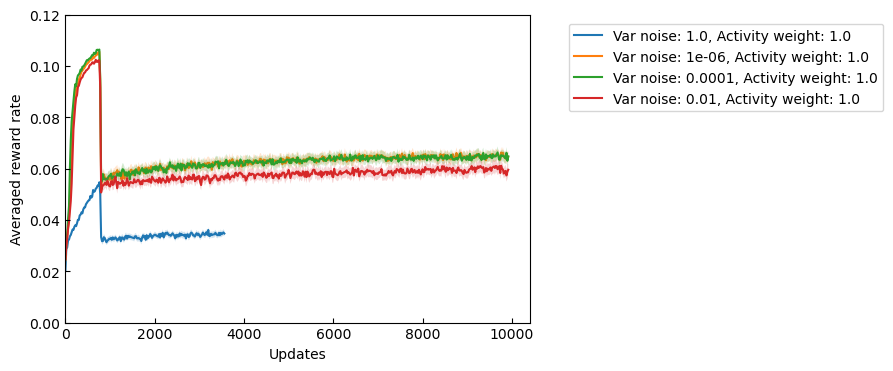

In [95]:
data_dir_regex = '../data/rl_agent_outputs/det_reward_to_stoch_noise_activity_weight_corrected_var_*_var_noise_*_activity_weight_*/reward_rates'

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

for data_dir in glob.glob(data_dir_regex):
    data_dir = data_dir.replace('\\', '/')
    parsed_components = parse_string_with_regex(data_dir, data_dir_regex)[1:]

    var_noise = float(parsed_components[0])
    activity_weight = float(parsed_components[1])

    # if var_noise != 1e6 or activity_weight < 1e-3:
    #     continue
    
    reduced_data = load_data(os.path.join(data_dir, '*.npy'))
    
    axs.fill_between(
        np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
        np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        alpha=0.2,
        zorder=1,
    )

    axs.plot(
        np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
        np.mean(reduced_data.T, axis=1),
        zorder=1,
        label=f'Var noise: {var_noise}, Activity weight: {activity_weight}',
    )

    print(np.mean(reduced_data.T, axis=1)[100:].max())

axs.set_ylim(0, 0.12)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(1.5, 0.875))
print()

0.06262500000000001



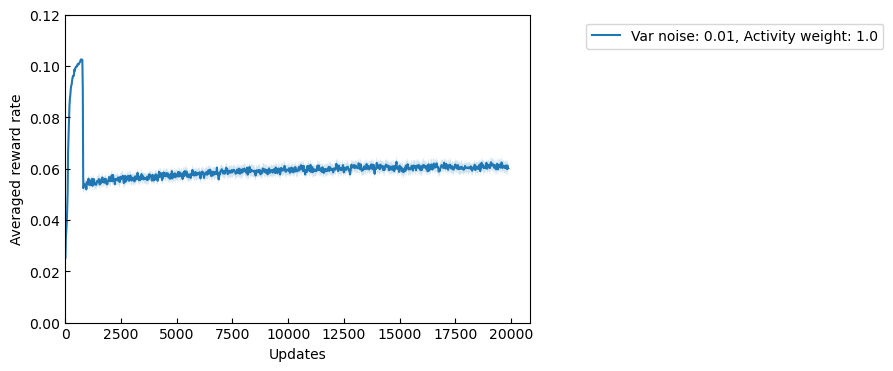

In [104]:
data_dir_regex = '../data/rl_agent_outputs/det_reward_to_stoch_noise_activity_weight_finer_search_*_var_noise_*_activity_weight_*/reward_rates'

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

for data_dir in glob.glob(data_dir_regex):
    data_dir = data_dir.replace('\\', '/')
    parsed_components = parse_string_with_regex(data_dir, data_dir_regex)[1:]

    var_noise = float(parsed_components[0])
    activity_weight = float(parsed_components[1])

    # if var_noise != 1e6 or activity_weight < 1e-3:
    #     continue
    
    reduced_data = load_data(os.path.join(data_dir, '*.npy'))
    
    axs.fill_between(
        np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
        np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        alpha=0.2,
        zorder=1,
    )

    axs.plot(
        np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
        np.mean(reduced_data.T, axis=1),
        zorder=1,
        label=f'Var noise: {var_noise}, Activity weight: {activity_weight}',
    )

    print(np.mean(reduced_data.T, axis=1)[100:].max())

axs.set_ylim(0, 0.12)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(1.5, 0.875))
print()